<a href="https://colab.research.google.com/github/prachikane/final_year_project/blob/main/RNN_Daywise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/My Drive/FinalYearProject/TCS.csv')

In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [ ]:
df=df[['Close']]
#df['Date']=df.index
df.dropna(inplace=True)
df.head()

,Close
0,987.95
1,979.00
2,962.65
3,986.75
4,988.10


In [ ]:
df

,Close
0,987.95
1,979.00
2,962.65
3,986.75
4,988.10
...,...
3925,2042.20
3926,2016.10
3927,2118.85
3928,2101.65


In [ ]:
#normalising data
from sklearn import preprocessing 

scaler = preprocessing.MinMaxScaler() 
data = scaler.fit_transform(df)
data

array([[0.19193401],
       [0.18916915],
       [0.18411826],
       ...,
       [0.54129532],
       [0.53598184],
       [0.52995783]])

In [ ]:
len(data)

3930

In [ ]:
x_train=data[0:(int)(0.7*len(data))]
x_test=data[(int)(0.7*len(data)):len(data)]



In [ ]:
print(len(x_train))
print(len(x_test))

2751
1179


In [ ]:
print(x_test)

[[0.6745957 ]
 [0.67487373]
 [0.67481194]
 ...
 [0.54129532]
 [0.53598184]
 [0.52995783]]


In [ ]:
# gives specific n_steps
def get_seq(data,ndx,n_steps):
  return data[ndx-n_steps:ndx]

In [ ]:
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
# split a univariate sequence into samples
#sequence = data, n_steps=time_steps
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
# choose number of time steps
n_steps = 60

# split into samples
X, y = split_sequence(x_train, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
#X = X.reshape(X.shape[0], X.shape[1], 1)
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(LSTM(50,return_sequences=True,activation='relu', input_shape=(n_steps, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,activation='relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,activation='relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1,activation='relu'))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=15,batch_size = 32)


Epoch 1/15
85/85 [==============================] - 9s 105ms/step - loss: 0.0192
Epoch 2/15
85/85 [==============================] - 9s 109ms/step - loss: 0.0033
Epoch 3/15
85/85 [==============================] - 9s 107ms/step - loss: 0.0031
Epoch 4/15
85/85 [==============================] - 9s 108ms/step - loss: 0.0031
Epoch 5/15
85/85 [==============================] - 9s 108ms/step - loss: 0.0028
Epoch 6/15
85/85 [==============================] - 9s 107ms/step - loss: 0.0028
Epoch 7/15
85/85 [==============================] - 9s 107ms/step - loss: 0.0024
Epoch 8/15
85/85 [==============================] - 9s 107ms/step - loss: 0.0023
Epoch 9/15
85/85 [==============================] - 9s 107ms/step - loss: 0.0034
Epoch 10/15
85/85 [==============================] - 9s 107ms/step - loss: 0.0022
Epoch 11/15
85/85 [==============================] - 9s 110ms/step - loss: 0.0019
Epoch 12/15
85/85 [==============================] - 9s 110ms/step - loss: 0.0022
Epoch 13/15
85/85 [======

In [ ]:
len(x_train)

2751

In [ ]:
#predicting
new_data=data.copy()

x_input=[]
for i in range((int)(0.7*len(new_data))-n_steps,len(new_data)):
  x_input.append(get_seq(new_data,i-1,n_steps))
  
x_input=np.array(x_input)
x_input = np.reshape(x_input, (x_input.shape[0], x_input.shape[1], 1))

yhat = model.predict(x_input)
output=scaler.inverse_transform(yhat)
output


array([[2531.5002],
       [2527.6365],
       [2524.5898],
       ...,
       [2041.4764],
       [2039.7698],
       [2038.3928]], dtype=float32)

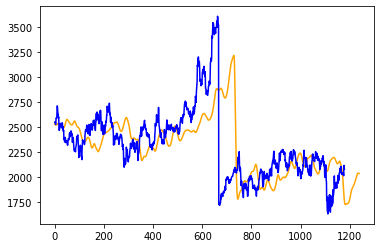

In [ ]:
import matplotlib.pyplot as plt

plt.plot(output,color="orange")

x_test_new=data[(int)(0.7*len(data)):len(data)]
x_test_new=scaler.inverse_transform(x_test_new)
plt.plot(x_test_new, color='blue')



In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
actual=data[(int)(0.7*len(data)):len(data)]
predicted=output[0:len(x_test)]

rmse= sqrt(mean_squared_error(actual, predicted, squared=False))
print(rmse)

48.41612139002686


In [ ]:
model.save('/content/drive/MyDrive/FinalYearProject/TCS_model.h5')